In [3]:
import random
import seaborn
import numpy as np
import pandas as pd
from lxml import etree
import matplotlib as plt
from IPython.display import display

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.semi_supervised import label_propagation
from sklearn.datasets import make_circles


In [5]:
coursera_ques_labels = pd.read_csv("coursera_ques_labels.csv", encoding = "utf-8")

C:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (1,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
coursera_ques_labels = coursera_ques_labels[["Text", "topic"]]

In [85]:
courses = coursera_ques_labels["Text"].head(533)

In [92]:
len(coursera_ques_labels) - 533

234408

In [93]:
quest = coursera_ques_labels["Text"].tail(234408)

In [8]:
import gensim

In [14]:
from gensim.models import Word2Vec

In [40]:
texts = coursera_ques_labels["Text"]

In [105]:
model1 = Word2Vec(courses)

In [106]:
model1

In [107]:
index = gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(model1.wv.syn0.T))

In [108]:
#index = gensim.similarities.MatrixSimilarity(gensim.matutils.Dense2Corpus(model1.wv.syn0))

In [109]:
#similarity_matrix = []
#for sims in index:
#    similarity_matrix.append(sims)
#similarity_array = np.array(similarity_matrix)

In [110]:
word_vectors = model1.wv.syn0.T

In [111]:
affprop = AffinityPropagation(affinity="euclidean", damping=0.5)
af= affprop.fit(word_vectors)

In [47]:
from sklearn.metrics.pairwise import cosine_distances
word_cosine = cosine_distances(model1.wv.syn0)

In [48]:
affprop = AffinityPropagation(affinity="precomputed", damping=0.5)
af= affprop.fit(word_cosine)

In [112]:
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [113]:
from sklearn import metrics

In [114]:
labels = af.labels_

In [115]:
label = ravel(labels)

In [116]:
from numpy import ravel

In [117]:
labels_true=ravel(labels_true)

In [118]:
print('Estimated number of clusters: %d' % n_clusters_)


Estimated number of clusters: 12


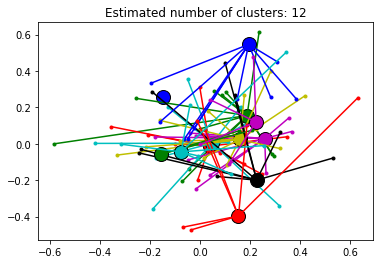

In [119]:
import matplotlib.pyplot as plt
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = word_vectors[cluster_centers_indices[k]]
    plt.plot(word_vectors[class_members, 0], word_vectors[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in word_vectors[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [29]:
af.fit_predict

<bound method ClusterMixin.fit_predict of AffinityPropagation(affinity='precomputed', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)>

In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(coursera_ques_labels["Text"])

In [82]:
X = X.toarray()

In [61]:
labels = coursera_ques_labels[["topic"]]

In [62]:
labels_true = labels.values

In [52]:
type(labels)

numpy.ndarray

In [ ]:
label_spread = label_propagation.LabelSpreading(kernel='knn', alpha=0.8)
label_spread.fit(X, labels)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [2]:
from nltk.corpus import stopwords

In [11]:
stop_words = set(stopwords.words('english'))
def stemm_stop_words(string):
    string = str(string)
    tokens = word_tokenize(string)

    ps = PorterStemmer()

    filtered_sentence = [w for w in tokens if not w in stop_words]

    stem_sentence = [ps.stem(w) for w in filtered_sentence]

    string = " ".join(stem_sentence)
    return string

In [14]:
post = pd.read_csv("posts (1).csv",  encoding = "utf-8")

In [16]:
post["Body"] = post["Body"].apply(stemm_stop_words)

In [82]:
tidy_quest.to_csv("tidy_questions.csv", encoding='utf-8')